# Pymaceuticals Inc.
---

### Analysis

- Capomulin Drug is applied to mouse most of the time
- Weight of the mouse and tumor volume are correlated to each other 
- Capomulin Drug has shown a significant effect on decreasing the tumor size
 

In [77]:
# Dependencies and Setup
import matplotlib.pyplot 
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_data_merged = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
mouse_data_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [78]:
mouse_data_merged.shape

(1893, 8)

In [79]:
# Checking the number of mice.
mouse_data_merged['Mouse ID'].nunique()

249

In [80]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_entries = mouse_data_merged[mouse_data_merged.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
mice = dup_entries['Mouse ID'].unique()
mice

array(['g989'], dtype=object)

In [81]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_entries

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [82]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_data_merged.drop_duplicates(subset='Mouse ID',keep='first')
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [83]:
# Checking the number of mice in the clean DataFrame.
clean_data['Mouse ID'].nunique()

249

In [84]:
#

In [85]:
summary_stats = mouse_data_merged.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Std Deviation', 'SEM']
#['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

# Display the summary statistics DataFrame
print(summary_stats)

                   Mean     Median   Variance  Std Deviation       SEM
Drug Regimen                                                          
Capomulin     40.675741  41.557809  24.947764       4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177       6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684       6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577       8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479       8.134708  0.596466
Placebo       54.033581  52.288934  61.168083       7.821003  0.581331
Propriva      52.322552  50.854632  42.351070       6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704       4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562       7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355       6.966589  0.516398


## Summary Statistics

In [86]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = mouse_data_merged.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [87]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_advanced = mouse_data_merged.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
).rename(columns={
    'mean': 'Tumor Volume (mm3) mean',
    'median': 'Tumor Volume (mm3) median',
    'var': 'Tumor Volume (mm3) var',
    'std': 'Tumor Volume (mm3) std',
    'sem': 'Tumor Volume (mm3) sem'
})

summary_stats_advanced


,Tumor Volume (mm3) mean,Tumor Volume (mm3) median,Tumor Volume (mm3) var,Tumor Volume (mm3) std,Tumor Volume (mm3) sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [112]:
counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

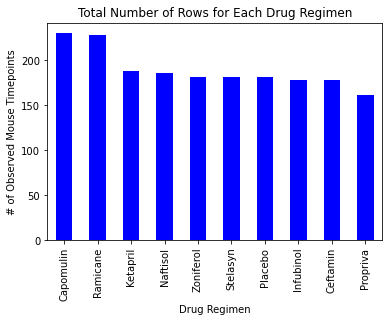

In [127]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = mouse_data_merged['Drug Regimen'].value_counts()
counts.plot(kind='bar',color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.show()

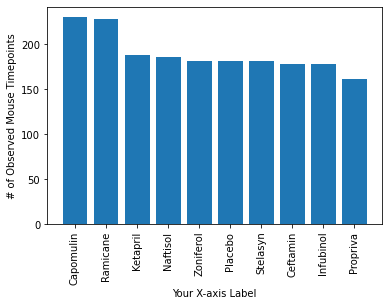

In [126]:
counts = mouse_data_merged.groupby('Drug Regimen').size().sort_values(ascending=False)
fig, ax = plt.subplots()
ax.bar(range(len(counts.index)), counts)
ax.set_xlabel('Your X-axis Label')
ax.set_ylabel('# of Observed Mouse Timepoints')

# Set tick locations and labels
ax.set_xticks(range(len(counts.index)))
ax.set_xticklabels(counts.index,rotation=90)

plt.show()

Text(0, 0.5, 'Sex')

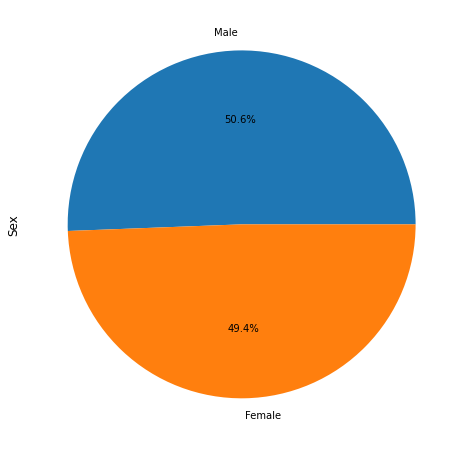

In [103]:
distribution_of_gender = mouse_data_merged['Sex'].value_counts()
pie_chart = distribution_of_gender.plot.pie(autopct='%1.1f%%',figsize=(8,8))
pie_chart.set_ylabel('Sex',fontsize=12)


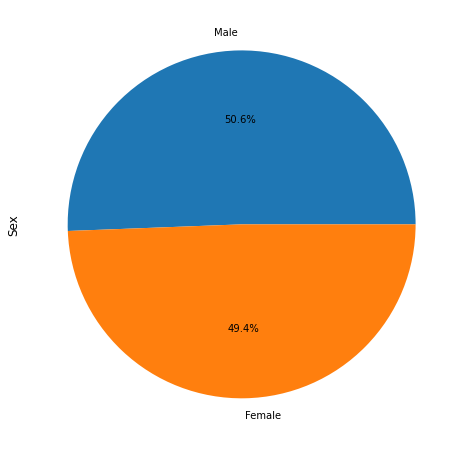

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#distribution_of_gender = mouse_data_merged['Sex'].value_counts()
fig,ax = plt.subplots(figsize=(8,8))
ax.pie(distribution_of_gender,labels=distribution_of_gender.index,autopct='%1.1f%%')
ax.set_ylabel('Sex',fontsize=12)
plt.show()

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
list_of_treatment = ['Capomulin','Ramicane','Infubinol','Ceftamin']
# Capomulin, Ramicane, Infubinol, and Ceftamin
data_of_treatment = mouse_data_merged[mouse_data_merged['Drug Regimen'].isin(list_of_treatment)]
# Start by getting the last (greatest) timepoint for each mouse
timepoint_last =data_of_treatment.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_final = pd.merge(timepoint_last,data_of_treatment,on=['Mouse ID','Timepoint'],how='left')
tumor_volume_final[['Mouse ID','Timepoint','Tumor Volume (mm3)','Drug Regimen']]

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane
...,...,...,...,...
95,y769,45,68.594745,Ceftamin
96,y793,45,31.896238,Capomulin
97,y865,45,64.729837,Ceftamin
98,z578,45,30.638696,Ramicane


In [50]:
# Put treatments into a list for for loop (and later for plot labels)
tumor_data = []
list_of_treatment = ['Capomulin','Ramicane','Infubinol','Ceftamin']

for treatment in list_of_treatment:
    volume = tumor_volume_final.loc[tumor_volume_final['Drug Regimen']==treatment,'Tumor Volume (mm3)']
# Create empty list to fill with tumor vol data (for plotting)
    tumor_data.append(volume)
    quartiles = volume.quantile([0.25,0.5,0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile - (1.5 * iqr)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    outliers = volume[(volume < lower_bound) | (volume >upper_bound)]
    # Locate the rows which contain mice on each drug and get the tumor volumes
    if len(outliers)>0:
        print(f"{treatment}'s potential outliers: {outliers}")
    else:
        print(f"{treatment}'s potential outliers: Series([],Name: Tumor Volume (mm3),dtype: float64)")
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: 9     38.982878
12    38.939633
24    30.485985
25    37.074024
26    40.159220
32    47.685963
33    37.311846
34    38.125164
35    38.753265
45    41.483008
49    38.846876
53    33.329098
64    46.539206
65    32.377357
68    41.581521
72    40.728578
73    34.455298
78    31.023923
82    40.658124
83    39.952347
88    36.041047
96    31.896238
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 3     38.407618
4     43.047543
5     38.810366
7     32.978522
16    38.342008
17    33.397653
19    37.311236
21    40.659006
27    29.128472
29    33.562402
30    36.374510
37    31.560470
38    36.134852
50    30.564625
54    31.095335
62    45.220869
63    36.561652
66    37.225650
67    43.419381
71    30.276232
77    40.667713
87    43.166373
94    44.183451
98    30.638696
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: 0     67.973419
1     65.525743
6     57.031862
8     66.083066
14    72.226731
15    3

<function matplotlib.pyplot.show(close=None, block=None)>

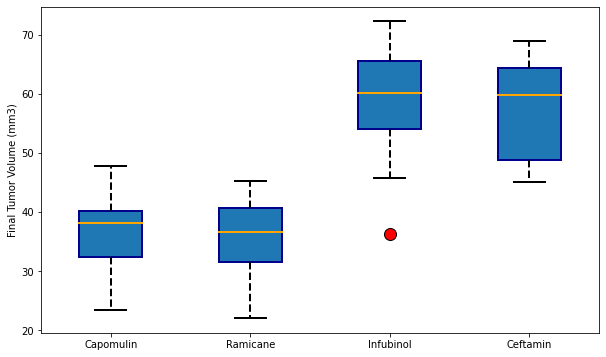

In [51]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10,6))
boxprops = dict(linestyle='-',linewidth=2,color='DarkBlue')
medianprops = dict(linestyle='-',linewidth=2,color='Orange')
flierprops = dict(marker='o',markerfacecolor='red',markersize=12,linestyle='none')
whiskerprops=dict(linestyle='--',linewidth=2)
capprops= dict(linestyle='-',linewidth=2)
plt.boxplot(tumor_data,labels=list_of_treatment,patch_artist=True,boxprops = boxprops,medianprops=medianprops,flierprops=flierprops,whiskerprops=whiskerprops,capprops=capprops)
plt.title('')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('')
plt.show

## Line and Scatter Plots

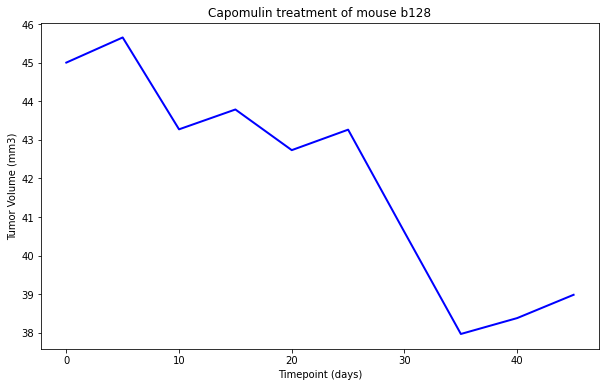

In [52]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
m_id = 'b128'
data_of_capomulin = mouse_data_merged[mouse_data_merged['Drug Regimen']=='Capomulin']
data_of_mouse = data_of_capomulin[data_of_capomulin['Mouse ID']==m_id]
plt.figure(figsize=(10,6))
plt.plot(data_of_mouse['Timepoint'],data_of_mouse['Tumor Volume (mm3)'],color='b',linestyle='-',linewidth=2)
plt.title(f"Capomulin treatment of mouse {m_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

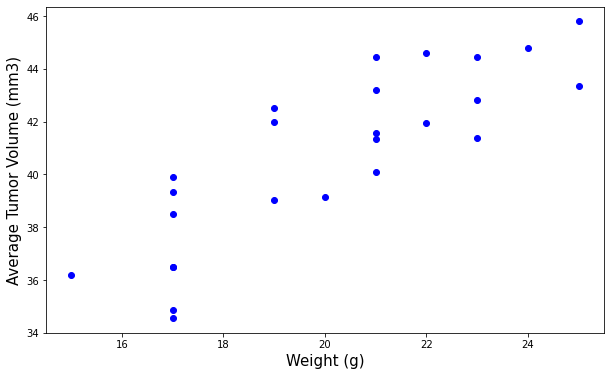

In [53]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = mouse_data_merged[mouse_data_merged['Drug Regimen']=='Capomulin']
volume_of_tumor = capomulin.groupby("Mouse ID").agg({"Tumor Volume (mm3)":'mean','Weight (g)':'first'}).reset_index()
#volume_of_tumor.rename(columns=)
plt.figure(figsize=(10,6))
plt.scatter(volume_of_tumor['Weight (g)'],volume_of_tumor['Tumor Volume (mm3)'],color='blue')
plt.title('')
plt.xlabel('Weight (g)',fontsize=15)
plt.ylabel('Average Tumor Volume (mm3)',fontsize=15)
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


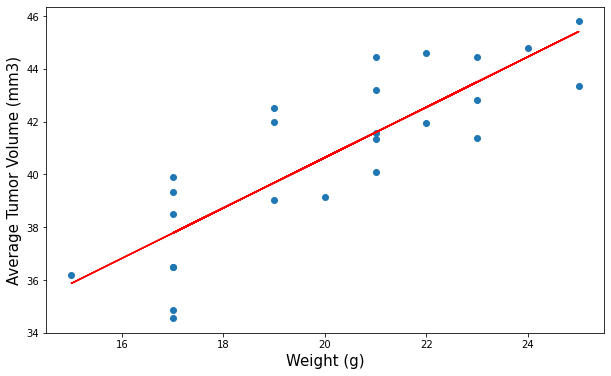

In [64]:

correlation = st.pearsonr(volume_of_tumor['Weight (g)'], volume_of_tumor['Tumor Volume (mm3)'])
print(f"The correlation  between mouse weight and average tumor volume is {correlation[0]:.2f}")
(slope, intrcpt, rvalue, pvalue, stderr) = linregress(volume_of_tumor['Weight (g)'], volume_of_tumor['Tumor Volume (mm3)'])
reg_values = volume_of_tumor['Weight (g)'] * slope + intrcpt
plt.figure(figsize=(10,6))
plt.scatter(volume_of_tumor['Weight (g)'], volume_of_tumor['Tumor Volume (mm3)'])
plt.plot(volume_of_tumor['Weight (g)'], reg_values, "r-")
plt.annotate('',(20,36), fontsize=15, color="red")
plt.xlabel('Weight (g)',fontsize=15)
plt.ylabel('Average Tumor Volume (mm3)',fontsize=15)
plt.show()
